In [1]:
# PCA as a noise reduction technique

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')

In [3]:
# import dataset from SciKitLearn
from sklearn.datasets import load_digits

digits = load_digits()
print(digits.keys())
print(digits.data.shape)

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
(1797, 64)


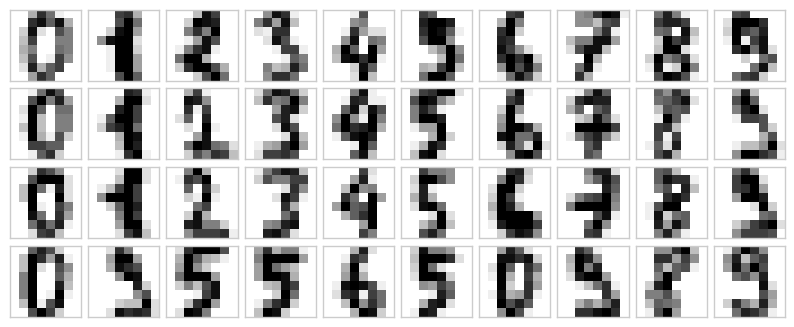

In [4]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10,4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8,8),
                  cmap='binary', interpolation='nearest', clim=(0,16))

plot_digits(digits.data)

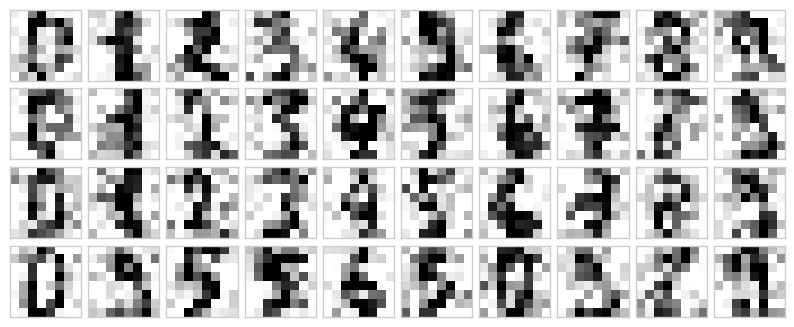

In [5]:
# Adding noise to the data and vizualisation of noised dataset
rng = np.random.default_rng(42)
noisy = rng.normal(digits.data, 4)
plot_digits(noisy)

Text(0, 0.5, 'Cumulative amount of explained variance')

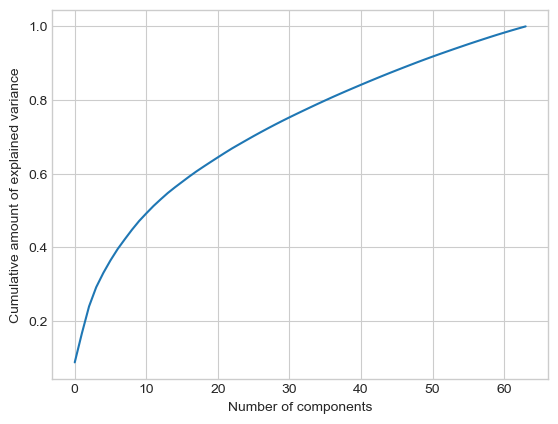

In [6]:
# Selection of the number of components by the explained variance ratio
from sklearn.decomposition import PCA

pca = PCA().fit(noisy)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of components")
plt.ylabel("Cumulative amount of explained variance")

In [7]:
### CONCLUSIONS:
### The curve quantifies how much of the total 64-dimensional variance is contained in the first N components.
### For example, in the case of the “data_digits” dataset, the first 10 principal components account for approximately 50% of the variance. 
### This shows us how much variance needs to be retained in order to determine a specific number of components. 
### According to the graph, in order to retain 90% of the variance, i.e., to lose small amount of data, approximately 50 components are needed.

In [8]:
# According to the explained variance ratio chart, training the PCA model (on noisy data) while maintaining 50% variance
pca = PCA(0.50).fit(noisy)
print("Number of PCA components: ", pca.n_components_)

Number of PCA components:  12


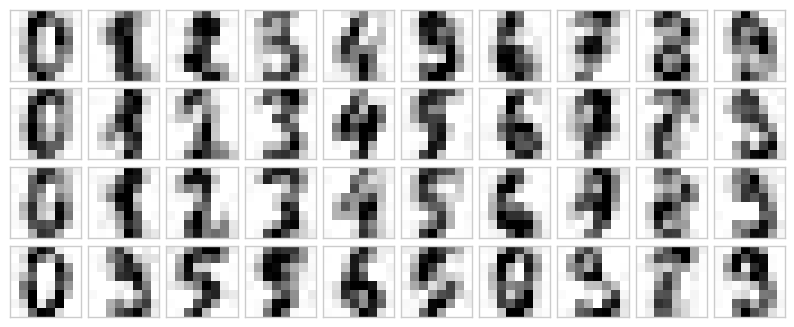

In [9]:
# Noise reduction
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)